In [1]:
import matplotlib.pylab as plt
import numpy as np
from scipy.stats import norm

import matplotlib as mpl
mpl.rcParams.update({'font.size': 18})
#fold = imp.load_source('fold', '/home/lgrose/bitbucket/ipython_notebooks/Bayesian/fold.py')
#variogram = imp.load_source('fold', '/home/lgrose/bitbucket/ipython_notebooks/Bayesian/variogram.py')
#from variogram import *

from fold import *
import math

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pymc as pymc

In [3]:
from bayesian_fourier_series import *
mpl.rcParams.update({'font.size': 18})


In [4]:
wl1= 15.#15.
wl2 = 150.
N = 100
foldfourier = fourierFold(30,30,wl1,0,40,20,0)
foldfourier2 = fourierFold(30,80,wl2,0,40,20,20)
foldr = foldRotation(foldfourier)
foldr2 = foldRotation(foldfourier2)
x_ = np.linspace(0,300,300)
x  = np.arange(0, 150,1)#np.linspace(0,150,100)
#x = np.hstack([x,np.arange(100,200)])
np.random.shuffle(x)



In [5]:
mixture = True
N = 30
x = x[:N]
fold= (foldfourier2.pos(x_))#+foldfourier.pos(x_)
foldpts = (foldfourier2.pos(x))#+foldfourier.pos(x)
x__ = x_
foldrot = np.arctan(np.gradient(fold))

foldrot*=180.0/np.pi
#foldrot+=30
#if mixture:
a = np.random.choice([1,1,1,1,1,1,1,1,1,1],N)
#    foldrot*=a
#x_ = []
#y_ = []

#add some noise to the x and y observations - simulate some uncertainty
for i in range(1):
    xx1, yy1 = shake_xy(x,foldrot[x]*a,5)
#   if mixture:
#        yy1*=a
#    x_.append(xx1)
#    y_.append(yy1)
#plt.plot(x,foldrot[x],'ro')
#plt.figure()
fourierseries = bayesian_fourier_series_model(xx1,yy1,1)
fourierseries.add_reference_foldshape(x_,fold)
fourierseries.add_reference_foldlocations(x,foldpts)
fourierseries.add_reference_foldprofile(x_,foldrot)
fourierseries.find_wavelength()
#fourierseries.wavelengths= [140.]
print fourierseries.wavelengths
print len(a[a==-1]), len(a)

89.60000000000001 145.60000000000002
[89.60000000000001, 145.60000000000002]
0 30


bayesian_fourier_series.py:384: UserWarning: Warning: converting a masked element to nan.
  variance[i] = np.mean(ma) / 2.


In [6]:
#if len()
#fourierseries.wavelengths.append(200.)
#sv = s_variogram(x,foldrot[x])
#sv.setup()
#sv.find_wavelengths()
#plt.plot(sv.lags,sv.variance)

#plt.figure()
#print fourierseries.semivariogram.lags, fourierseries.semivariogram.variance
#plt.plot(fourierseries.semivariogram.lags,fourierseries.semivariogram.variance,'bo')
#print fourierseries.wavelengths
fourierseries.wavelengths = [145.88]
print fourierseries.wavelengths
fourierseries.setup_inference()
#fourierseries.find_map()
fourierseries.run_sampler(10000,5000)
#scores = pymc.geweke(fourierseries.S, intervals=7)
#pymc.Matplot.geweke_plot(scores)
#pymc.Matplot.geweke_plot(pymc.geweke(fourierseries.S.trace('c_0')[:,]))

[145.88]
 [-----------------100%-----------------] 10000 of 10000 complete in 18.8 sec

True

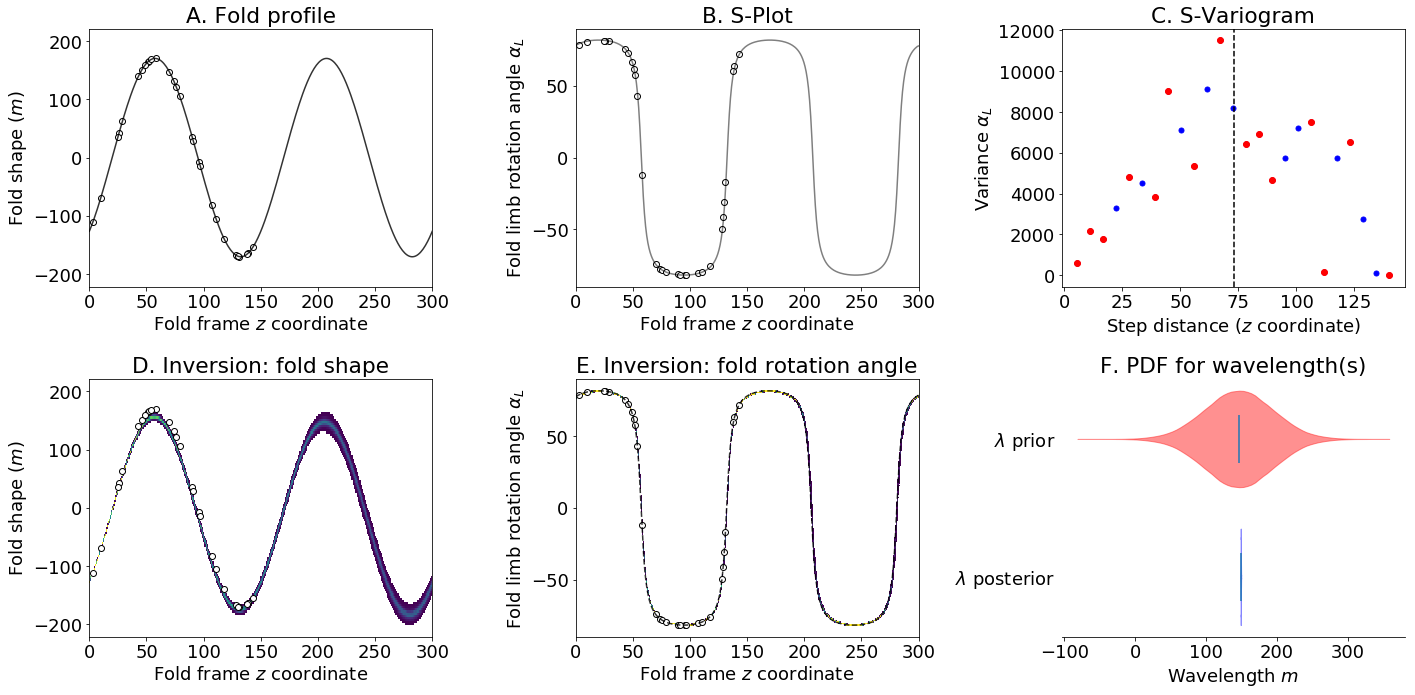

In [7]:
fig = bayesian_fourier_series_figure(fourierseries)
#fourierseries.semivariogram.
fig.plot_variogram()
fig.plot_reference_fold_points()
fig.plot_reference_fold_points('ko',0,1)
#fig.plot_reference_fold_shape('b-',0,1)

fig.plot_reference_fold_profile()
fig.plot_reference_fold_profile_points()
fig.plot_reference_fold_profile_points('ko',1,1)
#fig.plot_reference_fold_profile('b-',1,1)

fig.plot_reference_fold_shape()
fig.ax[0][0].set_title(r'A. Fold profile')
fig.ax[0][1].set_title(r'B. S-Plot')
fig.ax[0][2].set_title(r'C. S-Variogram')

fig.ax[1][1].set_title(r'E. Inversion: fold rotation angle')
fig.ax[1][0].set_title(r'D. Inversion: fold shape')
fig.ax[1][2].set_title(r'F. PDF for wavelength(s)')

fig.ax[0][0].set_xlabel(r'Fold frame $z$ coordinate')
fig.ax[0][1].set_xlabel(r'Fold frame $z$ coordinate')
fig.ax[0][2].set_xlabel(r'Step distance ($z$ coordinate)')

fig.ax[1][2].set_xlabel(r'Wavelength $m$')
#g.ax[1][2].set_ylabel(r'Probability')

fig.ax[0][1].set_ylabel(r'Fold limb rotation angle $\alpha_L$')
fig.ax[0][2].set_ylabel(r'Variance $\alpha_L$')

fig.ax[1][0].set_xlabel(r'Fold frame $z$ coordinate')
fig.ax[1][0].set_ylabel(r'Fold shape ($m$)')
fig.ax[0][0].set_ylabel(r'Fold shape ($m$)')

fig.ax[1][1].set_xlabel(r'Fold frame $z$ coordinate')
fig.ax[1][1].set_ylabel(r'Fold limb rotation angle $\alpha_L$')
H2 = fig.plot_curve_density(0,300)
fig.plot_fold_heat_map(fig.fourier_series_model.reference_fold_y[0])
#for i in range(10):
#    c, w = fig.plot_random_curve(i)
#print c,w
fig.plot_map(0,300,'k--')
#print ,fig.fourier_series_model.map.qw[1].value
colours = ['b-','r-']
#for i in range(len(fig.fourier_series_model.wavelengths)):
temp = fig.ax[0][0]
i = 0
#temp = fig.plot_kde('c_%i'%(i),1,2,'c_%i'%i,colours[i])
    #except:
    #    print "fail"
    #if i == 0:
    #    temp = fig.plot_normal_pdf(1,2,fig.fourier_series_model.wavelengths[i],\
    #                    fig.fourier_series_model.wavelengths[i]/3.,\
    #                    'prior_wavelength_%i'%i, colours[i]+'-')
    #else:
    #    fig.plot_normal_pdf2(temp,fig.f-ourier_series_model.wavelengths[i],\
    #                    fig.fourier_series_model.wavelengths[i]/3.,\
    #                    'prior_wavelength_%i'%i, colours[i]+'-')
    # print fig.fourier_series_model.map.qw[i].value
    #temp.legend(loc=i)
    #fig.plot
arrays = []
pos = []
labels = []
c = len(fourierseries.wavelengths)/2
for i in range(len(fourierseries.wavelengths)):
    arrays.append(np.random.normal(fourierseries.wavelengths[i],fourierseries.wavelengths[i]/3.,100000))
    labels.append(r"$\lambda$ prior")
    pos.append(c)
    c-=1
    arrays.append(fourierseries.S.trace('qw_%i'%i)[:][:])
    labels.append(r"$\lambda$ posterior")

    pos.append(c)
    c-=1
fig.plot_violin(1,2,labels,pos,arrays)
plt.tight_layout()
for i in range(2):
    for j in range(2):
        fig.ax[i][j].set_xlim(0,300)
fig.ax[1][2].spines['top'].set_visible(False)
fig.ax[1][2].spines['right'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
fig.ax[1][2].spines['left'].set_visible(False)
fig.ax[1][2].tick_params(top='off', bottom='on', left='off', right='off', labelleft='on', labelbottom='on')

In [8]:
fig.fig.savefig("single_fold_proof_of_concept.svg")

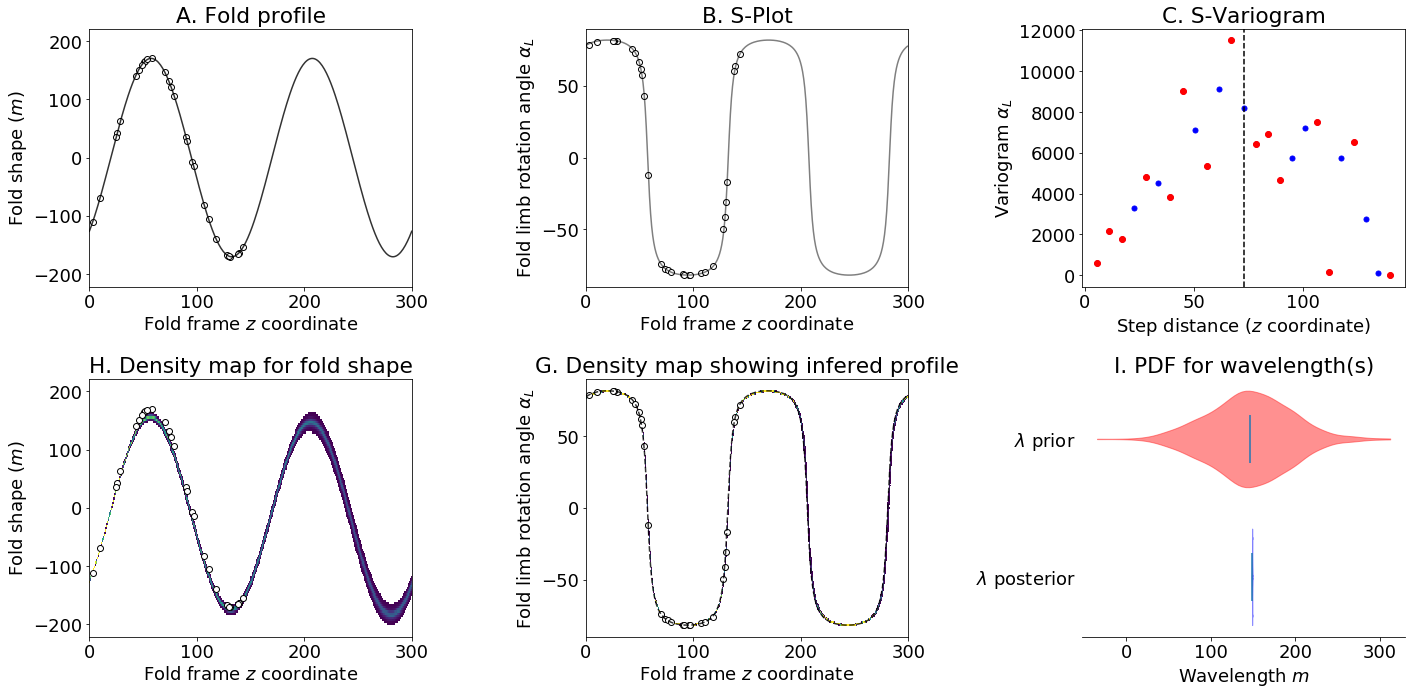

In [9]:
fig = bayesian_fourier_series_figure(fourierseries)
#fourierseries.semivariogram.
fig.plot_variogram()
fig.plot_reference_fold_points()
fig.plot_reference_fold_points('ko',0,1)
#fig.plot_reference_fold_shape('b-',0,1)

fig.plot_reference_fold_profile()
fig.plot_reference_fold_profile_points()
fig.plot_reference_fold_profile_points('ko',1,1)
#fig.plot_reference_fold_profile('b-',1,1)

fig.plot_reference_fold_shape()
fig.ax[0][0].set_title(r'A. Fold profile')
fig.ax[0][1].set_title(r'B. S-Plot')
fig.ax[0][2].set_title(r'C. S-Variogram')

fig.ax[1][1].set_title(r'G. Density map showing infered profile')
fig.ax[1][0].set_title(r'H. Density map for fold shape')
fig.ax[1][2].set_title(r'I. PDF for wavelength(s)')

fig.ax[0][0].set_xlabel(r'Fold frame $z$ coordinate')
fig.ax[0][1].set_xlabel(r'Fold frame $z$ coordinate')
fig.ax[0][2].set_xlabel(r'Step distance ($z$ coordinate)')

fig.ax[1][2].set_xlabel(r'Wavelength $m$')
#g.ax[1][2].set_ylabel(r'Probability')

fig.ax[0][1].set_ylabel(r'Fold limb rotation angle $\alpha_L$')
fig.ax[0][2].set_ylabel(r'Variogram $\alpha_L$')

fig.ax[1][0].set_xlabel(r'Fold frame $z$ coordinate')
fig.ax[1][0].set_ylabel(r'Fold shape ($m$)')
fig.ax[0][0].set_ylabel(r'Fold shape ($m$)')

fig.ax[1][1].set_xlabel(r'Fold frame $z$ coordinate')
fig.ax[1][1].set_ylabel(r'Fold limb rotation angle $\alpha_L$')
H2 = fig.plot_curve_density(0,300)
fig.plot_fold_heat_map(fig.fourier_series_model.reference_fold_y[0])
#for i in range(10):
#    c, w = fig.plot_random_curve(i)
#print c,w
fig.plot_map(0,300,'k--')
#print ,fig.fourier_series_model.map.qw[1].value
colours = ['b-','r-']
#for i in range(len(fig.fourier_series_model.wavelengths)):
temp = fig.ax[0][0]
i = 0
#temp = fig.plot_kde('c_%i'%(i),1,2,'c_%i'%i,colours[i])
    #except:
    #    print "fail"
    #if i == 0:
    #    temp = fig.plot_normal_pdf(1,2,fig.fourier_series_model.wavelengths[i],\
    #                    fig.fourier_series_model.wavelengths[i]/3.,\
    #                    'prior_wavelength_%i'%i, colours[i]+'-')
    #else:
    #    fig.plot_normal_pdf2(temp,fig.f-ourier_series_model.wavelengths[i],\
    #                    fig.fourier_series_model.wavelengths[i]/3.,\
    #                    'prior_wavelength_%i'%i, colours[i]+'-')
    # print fig.fourier_series_model.map.qw[i].value
    #temp.legend(loc=i)
    #fig.plot
arrays = []
pos = []
labels = []
c = len(fourierseries.wavelengths)/2
for i in range(len(fourierseries.wavelengths)):
    arrays.append(np.random.normal(fourierseries.wavelengths[i],fourierseries.wavelengths[i]/3.,1000))
    labels.append(r"$\lambda$ prior")
    pos.append(c)
    c-=1
    arrays.append(fourierseries.S.trace('qw_%i'%i)[:][:])
    labels.append(r"$\lambda$ posterior")

    pos.append(c)
    c-=1
fig.plot_violin(1,2,labels,pos,arrays)
plt.tight_layout()
for i in range(2):
    for j in range(2):
        fig.ax[i][j].set_xlim(0,300)
fig.ax[1][2].spines['top'].set_visible(False)
fig.ax[1][2].spines['right'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
fig.ax[1][2].spines['left'].set_visible(False)
fig.ax[1][2].tick_params(top='off', bottom='on', left='off', right='off', labelleft='on', labelbottom='on')

In [55]:
fig.fig.savefig("single_fold_proof_of_concept_polarity_corrected.svg")

In [27]:
pymc.Matplot.plot(fourierseries.S.trace("i"))

KeyError: 'i'

In [ ]:
axes[0, 0].violinplot(data, pos, points=20, widths=0.3,
                      showmeans=True, showextrema=True, showmedians=True)
fourierseries.sample_using_emcee()
print fourierseries.model_e

In [ ]:
print np.mean(fourierseries.S.trace('c_0')[:,]), np.std(fourierseries.S.trace('c_0')[:,])

In [ ]:
for i in range(2*3):
    print i

In [ ]:
from scipy import stats
print np.min(H2.flatten())
print np.max(H2.flatten())
#H = stats.boxcox(H2.flatten())
test = H2.copy()
test[test==0.0] = np.nan


plt.imshow((np.rot90(test)),  extent=[0, 300, -90, 90],aspect='auto')

#plt.imshow(masked_array.nonzero(), interpolation='nearest', cmap=cmap)
#print np.mean(H2), np.std(H2), np.max(H2)
#plt.imshow(np.rot90(H),cmap="Greys")

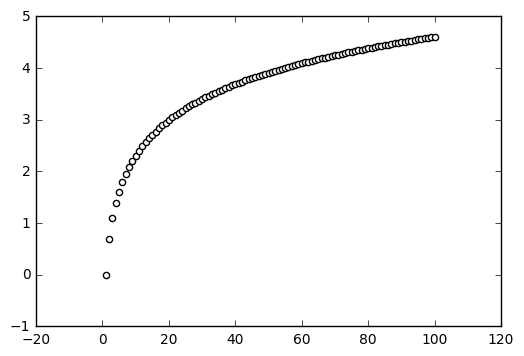

In [14]:
x = np.linspace(1,100,100)
plt.scatter(x,np.log(x),marker='o',edgecolor='black',facecolor='white')#, edgecolor='black', linewidth='3', facecolor='green')

In [ ]:
#a = plt.hist(H.flatten(),100)
#plt.figure()
a2 = plt.hist(np.nonzero(H2.flatten()),100)

In [ ]:
print fig.C_[:][0,:]
#pymc.Matplot.plot(fourierseries.S)

In [ ]:
import pickle
path = './export/'
name = 'parasitic_fold_15_150_flipped_data_prior_proof_of_concept'
fig.fig.savefig(path+name+'.png')
fig.fig.savefig(path+name+'.svg')
#pickle.dump(fourierseries,open(path+name+'.pkl',"wb"))

In [ ]:
wl = 3
N = 5
for i in range(wl):
    for j in range(1,N+1):
        #print i, j
        #print (2*j-1)*2-i
        print (2*j-1)+i*2*N
        print (2*j)+i*2*N

In [ ]:
#ax = plt.subplot2grid((2,2),(0, 0))
ax = []
ni = 3
nj = 3
for i in range(ni):
    ax1 = []
    for j in range(nj):
        axt = plt.subplot2grid((ni,nj), (i,j))
        ax1.append(axt)
    ax.append(ax1)

In [ ]:
v = fig.v

print len(v)
#ymin = -90
#ymax = 90
x = fig.x

vv = np.linspace(-90,90,180)

H = np.zeros((len(x),len(vv)))
for i in range(len(x)):
    for j in range(len(v)):
        vind = np.nonzero(np.abs(vv-v[j][i]) == np.min(np.abs(vv-v[j][i])))[0]
        H[i,vind[0]]+=1
        
plt.matshow(np.rot90(H),extent=[0,600,-90,90],aspect='auto')


In [ ]:
def run_model_test(wl1,wl2,mixture,samples,x,N,use_wl):
    foldfourier = fourierFold(30,40,wl1,0,40,20,0)
    foldfourier2 = fourierFold(30,80,wl2,0,40,20,20)
    foldr = foldRotation(foldfourier)
    foldr2 = foldRotation(foldfourier2)
    x_ = np.linspace(0,600,600)
    #x  = np.arange(0, 600,1)#np.linspace(0,150,100)
    #np.random.shuffle(x)
    x = x[:N]
    fold= (foldfourier.pos(x_))+foldfourier2.pos(x_)
    foldpts = (foldfourier.pos(x))+foldfourier2.pos(x)
    x__ = x_
    foldrot = np.arctan(np.gradient(fold))

    foldrot*=180.0/np.pi
    if mixture:
        a = np.random.choice([-1,1,1,1,1,1,1],N)
        #foldrot*=a
    x_ = []
    y_ = []

    #add some noise to the x and y observations - simulate some uncertainty
    for i in range(1):
        xx1, yy1 = shake_xy(x,foldrot[x],10)
        if mixture:
            yy1*=a
        x_.append(xx1)
        y_.append(yy1)
    fourierseries = compositeBayesianFourierSeries(x_,y_,1)
    if mixture:
        fourierseries = compositeBayesianFourierSeries(x_,y_,1,a)
    fourierseries.plot_fold_profile(x__,fold)
    fourierseries.find_wavelength()
    fig.ax[0][2].set_title(r'C. S-Variogram ')
    fourierseries.plot_variogram()
    #fourierseries.set_wavelength_sd = [1]
    print fourierseries.wavelengths
    if use_wl:
        fourierseries.wavelengths = [wl1,wl2]
    print fourierseries.wavelengths
    if mixture:
        s = fourierseries.setup_inference_mixture()
    if not mixture:
        s = fourierseries.setup_inference()
    fourierseries.run_sampler(samples, samples*.5)
    minx = 0
    maxx = 600
    fourierseries.plot_curve_density(minx,maxx)
    if not mixture:
        fourierseries.plot_fold_heat_map(fold[0])
        fourierseries.plot_map(minx,maxx,fold[0])
    #for i in range(len(fourierseries.wavelengths)):
    #    for c in range(3):
    #        fourierseries.plot_kde("c_%i_%i" %(c,i),0,3)
    #plt.figure()

    for i in range(len(fourierseries.wavelengths)):
        w = fourierseries.wavelengths[i]
        try:
            fourierseries.plot_kde("qw_%i" %i,1,2)
            #kde = stats.gaussian_kde(np.normal(wfourierseries.wavelengths[i],fourierseries.wavelengths[i]/1.125,size=1000))
            
        except:
            print "Exception"
        x = np.linspace(0,w+w,1000)
        fig.ax[1][2].plot(x,plt.mlab.normpdf(x,w,w*.125),'k--')
        fig.ax[1][2].axvline(w,color='k',linestyle='--')

        
        
    fig.ax[0][0].set_title(r'A. Fold profile')
    fig.ax[0][1].set_title(r'B. S-Plot')
    fig.ax[1][1].set_title(r'E. Density map showing infered profile')
    fig.ax[1][0].set_title(r'D. Density map for fold shape')
    fig.ax[1][2].set_title(r'F. PDF for wavelengths')

    fig.ax[0][0].set_xlabel(r'Fold frame $z$ coordinate')
    fig.ax[0][1].set_xlabel(r'Fold frame $z$ coordinate')
    fig.ax[0][2].set_xlabel(r'Step distance ($z$ coordinate)')
    
    fig.ax[1][2].set_xlabel(r'Wavelength $m$')
    fig.ax[1][2].set_ylabel(r'Probability')

    fig.ax[0][1].set_ylabel(r'Fold limb rotation angle $\alpha_L$')
    fig.ax[0][2].set_ylabel(r'Variance $\alpha_L$)')

    fig.ax[1][0].set_xlabel(r'Fold frame $z$ coordinate')
    fig.ax[1][0].set_ylabel(r'Fold shape ($m$)')
    fig.ax[0][0].set_ylabel(r'Fold shape ($m$)')

    fig.ax[1][1].set_xlabel(r'Fold frame $z$ coordinate')
    fig.ax[1][1].set_ylabel(r'Fold limb rotation angle $\alpha_L$')
    #fig.ax[1][1].legend()
    #fig.ax[1][2].legend()
    fig.ax[1][0].set_ylim(-200,200)
    fig.ax[0][0].set_ylim(-200,200)

    `fourierseries.set_xlims(minx,maxx)
    plt.savefig('figures/fourier_series_wl1_%i_wl2_%i_points_%i.svg'%(wl1,wl2,N))
    plt.savefig('figures/fourier_series_wl1_%i_wl2_%i_points_%i.png'%(wl1,wl2,N))

    #pymc.Matplot.plot(fourierseries.S)

In [ ]:
import numpy as np
import pymc
import matplotlib.pyplot as plt
from scipy import stats
class bayesian_fourier_series_model:
    def __init__(self,xdata,ydata,N):
        self.xdata = xdata
        self.ydata = np.tan(ydata)*np.pi/180.
        self.wavelength = 0.0
        self.setup = False
        self.N = N
        self.use_mixture = False
        self.xmin = min(self.xdata)
        self.xmax = max(self.xdata)
        self.wavelength_sd_defined = False
    def set_wavelength_sd(wavelength_sd):
        self.wavelength_sd = wavelength_sd
        self.wavelength_sd_defined = True
    def find_wavelength(self,step=0,nlags=0):
        self.semivariogram = semiVariogram(self.xdata,np.arctan(self.ydata)*180./np.pi)
        cont = True
        self.wavelengths = []
        wl1, wl2 = self.semivariogram.find_wavelengths(step,nlags)
        #print vario, wl
        print "Wavelength guesses: ", wl1, wl2
        if np.abs(wl1 - wl2) < wl1*.2:
            self.wavelengths.append((wl1+wl2)/2.)
            return
        self.wavelengths.append(wl1)
        self.wavelengths.append(wl2)
    def setup_inference(self):
        #depending on the number of wavelengths
        #self.wavelengths = [self.wavelengths[len(self.wavelengths)-1]]
        wavelength_number = len(self.wavelengths)
        
        t = 1. / 5.**2
        #C_sigs = pymc.Container([pymc.HalfCauchy("c_sigs_%i_%i" % (i, x), beta = 10, alpha=1) \
        #                         for i in range(1+2*self.N) for x in range(wavelength_number)])
        C = pymc.Container([pymc.Normal("c_%i_%i" % (i, x), mu=0, tau = t) \
                            for i in range(1+2*self.N) for x in range(wavelength_number)])
        #i_ = pymc.Container([pymc.DiscreteUniform('i_%i' %i,lower=0,upper=1) for i in range(len(self.xdata))])
        @pymc.stochastic(observed=False)
        def sigma(value=1):
            return -np.log(abs(value))
        @pymc.stochastic(observed=False)
        def sigma3(value=1):
            return -np.log(abs(value))
        
        qw_sigs =  pymc.Container([pymc.HalfCauchy("qw_sigs_%i" % x, beta = 10, alpha=1) \
                                 for x in range(wavelength_number)])
        if self.wavelength_sd_defined:
            qw = pymc.Container([pymc.distributions.Lognormal('qw_%i' %x,mu=self.wavelengths[x], \
                                                       tau = 1. / self.wavelength_sd[x] ** 2) \
                                 for x in range(wavelength_number)])
        else:
            qw = pymc.Container([pymc.distributions.Normal('qw_%i' %x,mu=self.wavelengths[x], tau = 1. / self.wavelengths[x]*.125) \
                                                       for x in range(wavelength_number)])



        def fourier_series(C,N,QW,x,wavelength_number):
            v = np.array(x)
            v.fill(0.0)
            v = v.astype('float')
            for ii in range(len(x)):
                for w in range(wavelength_number):
                    v += C[w]
                    for i in range(1,N+1):
                        v[ii] = v[ii] + C[(2*i-1)*wavelength_number+w]*np.cos(2*np.pi/QW[w] * i * (x[ii])) + \
                        C[(2*i)*wavelength_number+w]*np.sin(2*np.pi/QW[w] * i * (x[ii]))
                #if i_[ii] == 0:
                #    v[ii] = -v[ii]
            return v#np.sum(v)
        self.vector_fourier_series = np.vectorize(fourier_series)
        # Define the form of the model and likelihood
        @pymc.deterministic
        def y_model(C=C,x=self.xdata,qw=qw,nn=self.N,wavelength_number=wavelength_number):
            return fourier_series(C,nn,qw,x,wavelength_number) 
        y = pymc.Normal('y', mu=y_model, tau=1. / sigma ** 2, observed=True, value=self.ydata)
        # package the full model in a dictionary
        self.model1 = dict(C=C, qw=qw, sigma=sigma,qw_sigs=qw_sigs,
                      y_model=y_model, y=y,x_values=self.xdata,y_values=self.ydata)
        self.setup = True
        self.mcmc_uptodate = False
        return self.model1
    def setup_inference_mixture(self):
        #depending on the number of wavelengths
        #self.wavelengths = [self.wavelengths[len(self.wavelengths)-1]]
        wavelength_number = len(self.wavelengths)
        
        t = 1. / 2.5**2
        C_sigs = pymc.Container([pymc.HalfCauchy("c_sigs_%i_%i" % (i, x), beta = 10, alpha=1) \
                                 for i in range(1+2*self.N) for x in range(wavelength_number)])
        C = pymc.Container([pymc.Normal("c_%i_%i" % (i, x), mu=0, tau = 1. / C_sigs[i*wavelength_number+x]**2) \
                            for i in range(1+2*self.N) for x in range(wavelength_number)])
        i_ = pymc.Container([pymc.DiscreteUniform('i_%i' %i,lower=0,upper=1) for i in range(len(self.xdata))])
        @pymc.stochastic(observed=False)
        def sigma(value=1):
            return -np.log(abs(value))
        @pymc.stochastic(observed=False)
        def sigma3(value=1):
            return -np.log(abs(value))
        
        qw_sigs =  pymc.Container([pymc.HalfCauchy("qw_sigs_%i" % x, beta = 10, alpha=1) \
                                 for x in range(wavelength_number)])
        if self.wavelength_sd_defined:
            qw = pymc.Container([pymc.distributions.Lognormal('qw_%i' %x,mu=self.wavelengths[x], \
                                                       tau = 1. / self.wavelength_sd[x] ** 2) \
                                 for x in range(wavelength_number)])
        else:
            qw = pymc.Container([pymc.distributions.Uniform('qw_%i' %x,lower=0., upper=self.wavelengths[x]*2) \
                                                       for x in range(wavelength_number)])


        def fourier_series(C,N,QW,x,wavelength_number,i_):
            v = np.array(x)
            v.fill(0.0)
            v = v.astype('float')
            for ii in range(len(x)):
                for w in range(wavelength_number):
                    v += C[w]
                    for i in range(1,N+1):
                        v[ii] = v[ii] + C[(2*i-1)*wavelength_number+w]*np.cos(2*np.pi/QW[w] * i * (x[ii])) + \
                        C[(2*i)*wavelength_number+w]*np.sin(2*np.pi/QW[w] * i * (x[ii]))
                #if i_[ii] == 0:
                #    v[ii] = -v[ii]
            return v#np.sum(v)
        self.vector_fourier_series = np.vectorize(fourier_series)
        # Define the form of the model and likelihood
        @pymc.deterministic
        def y_model(C=C,x=self.xdata,qw=qw,nn=self.N,wavelength_number=wavelength_number,i_=i_):
            return fourier_series(C,nn,qw,x,wavelength_number,i_) 
        y = pymc.Normal('y', mu=y_model, tau=1. / sigma ** 2, observed=True, value=self.ydata)
        # package the full model in a dictionary
        self.model1 = dict(C=C, qw=qw, sigma=sigma,qw_sigs=qw_sigs,
                      y_model=y_model, y=y,x_values=self.xdata,y_values=self.ydata,i_=i_)
        self.setup = True
        self.mcmc_uptodate = False
        return self.model1
    def run_sampler(self, samples = 10000, burnin = 5000):
        self.S = pymc.MCMC(self.model1)
        self.S.sample(iter=samples, burn=burnin)
        self.mcmc_uptodate = True
        return self.S
    def find_map(self):
        self.map = pymc.MAP(self.model1)
        self.map.fit()
    def plot_variogram(self):
        plt.sca(self.ax[0][2])
        self.semivariogram.plot()
    def plot_curve_density(self,xmin,xmax):
        #a = np.zeros(self.xdata[]
        #for i in range(len(self.xdata)):
        #    sign  = stats.mode(self.S.trace("i_%i"%i)[:])[0][0]
        #    if sign == 0:
        #        sign = -1
        #    a.append(sign)

        #a = np.array(a)

        if self.mcmc_uptodate == False:
            self.run_sampler()
        wavelength_number = len(self.wavelengths)
        self.C_ =  []
        for i in range (1+2*self.N):
            for x in range(wavelength_number):
                self.C_.append(self.S.trace('c_%i_%i' %(i,x))[:])
        
        self.qw = []
        for x in range(wavelength_number):
            self.qw.append(self.S.trace('qw_%i' %x)[:])
        ends_ = (self.xmax-self.xmin)*2
        x = np.linspace(xmin,xmax,600)
        v = np.array((self.C_[0][:,None]))
        v.fill(0.0)
        for w in range(wavelength_number):
            v += self.C_[w][:,None]
            for i in range(1,self.N+1):
                v = v + self.C_[(2*i-1)*wavelength_number+w][:,None]*\
                np.cos(2*np.pi/self.qw[w][:,None] * i * x) + self.C_[(2*i)*wavelength_number+w][:,None]\
                *np.sin(2*np.pi/self.qw[w][:,None] * i * x)
        self.v = np.arctan(v)*180.0/np.pi
        self.x = x
        #ymin = -90
        #ymax = 90
        x_f = np.tile(x,len(self.qw[0]))
        y_f = self.v.flatten()
        #values = np.vstack([x_f,y_f])
        #kernel = stats.gaussian_kde(values)
        #x, y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
        #positions = np.vstack([x.ravel(), y.ravel()])
        #f = np.reshape(kernel(positions).T, x.shape)
        #
        #
        #self.ax[1][1].imshow(np.log(np.rot90(f))+1, cmap=plt.cm.gist_earth_r, extent=[xmin, xmax, -90, 90],aspect='auto')

        heatmap, xedges, yedges = np.histogram2d(x_f,y_f,bins=(600,360))
        extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

        logheat = np.log(heatmap+1)
        self.ax[1][1].imshow(logheat.T, extent=extent, origin='lower',cmap='Greys',aspect='auto')
        #ax.colorbar()
        if self.black_white:
            colour = 'k*'
        else:
            colour = 'b*'
        self.ax[1][1].plot(self.xdata,np.arctan(self.ydata)*180.0/np.pi,colour,markersize=4,alpha=0.7)
        return
    def plot_map(self,xmin,xmax,intercept):
        self.find_map()
        wavelength_number = len(self.wavelengths)
        x = np.linspace(xmin,xmax,600)

        map_v = np.array(x)
        map_v.fill(0.0)
        
        for w in range(wavelength_number):
            map_v += self.map.C[w].value
            for i in range(1,self.N+1):
                map_v = map_v + self.map.C[(2*i-1)*wavelength_number+w].value * np.cos(2*np.pi/ \
                self.map.qw[w].value* i * x) + self.map.C[(2*i)*wavelength_number+w].value \
                *np.sin(2*np.pi/self.map.qw[w].value*i*x)
        map_v = np.arctan(map_v)*180. / np.pi
        if self.black_white:
            colour = 'k--'
        else:
            colour = 'r-'
        self.ax[1][1].plot(x,map_v,colour)   
        gradient = np.tan(map_v*np.pi/180.)
        #start all points at xmin = 0
        step = x[1] - x[0]
        p = []
        for i in range(len(self.x)):
            if not p:
                p.append(intercept)
                continue
            else:
                if i == (len(self.x) - 1):
                    p_ = p[len(p)-1] + ((gradient[i-1]+gradient[i]) / 2.) * step
                else:
                    p_ = p[len(p)-1] + ((gradient[i-1]+gradient[i+1]) / 2.) * step
                p.append(p_)
        self.ax[1][0].plot(x,p,colour)
    def plot_random_fold_shape(self,i):
        y = self.v[i]
        gradient = np.tan(y*np.pi/180.)
        #start all points at xmin = 0
        step = self.x[1] - self.x[0]
        p = []
        for i in range(len(self.x)):
            if not p:
                p.append(intercept)
                continue
            else:
                if i == (len(self.x) - 1):
                    p_ = p[len(p)-1] + ((gradient[i-1]+gradient[i]) / 2.) * step
                else:
                    p_ = p[len(p)-1] + ((gradient[i-1]+gradient[i+1]) / 2.) * step
                p.append(p_)
        plt.plot(self.x,p)
            
    def plot_fold_heat_map(self, intercept):
        pr_ = []
        for i in range(len(self.qw[0])):            
            y = self.v[i]
            gradient = np.tan(y*np.pi/180.)
            #start all points at xmin = 0
            step = self.x[1] - self.x[0]
            p = []
            for i in range(len(self.x)):
                if not p:
                    p.append(intercept)
                    continue
                else:
                    if i == (len(self.x) - 1):
                        p_ = p[len(p)-1] + ((gradient[i-1]+gradient[i]) / 2.) * step
                    else:
                        p_ = p[len(p)-1] + ((gradient[i-1]+gradient[i+1]) / 2.) * step
                    p.append(p_)
            pr_.append(p)
                      
        #plt.plot(self.x,p)
        
        
        x_f = np.tile(self.x,len(self.qw[0]))
        y_f = np.array(pr_).flatten()
        
        heatmap, xedges, yedges = np.histogram2d(x_f,y_f,bins=(600,360))
        extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

        logheat = np.log(heatmap+1)
        #plt.clf()
        self.ax[1][0].imshow(logheat.T, extent=extent, origin='lower',cmap='Greys',aspect='auto')
        #ax.colorbar()
        #plt.figure()
        #plt.plot(self.xdata,np.arctan(self.ydata)*180./np.pi,'bo',markersize=5,alpha=0.7)
        
    def plot_traces(self):
        pymc.Matplot.plot(self.S)
    def plot_trace(self,name):
        pymc.Matplot.plot(name)
    def plot_kde(self,name,x,y):
        d = self.S.trace(name)[:][:]
        minn = min(d)
        maxx = max(d)
        diff = (maxx-minn) / 4.
        minn = minn - diff
        maxx = maxx + diff
        ind = np.linspace(minn,maxx,100)
        kde = stats.gaussian_kde(d)
        kdepdf = kde.evaluate(ind)
        #kdepdf = np.log(kdepdf)
        if self.ax[x][y].has_data():
            temp = self.ax[x][y].twinx()
            temp.plot(ind,kdepdf,'k-')
            return
        self.ax[x][y].plot(ind,kdepdf,label=name)
    def plot_random_curve(self,ii):
        i = np.random.randint(0,len(self.v))
        y = self.v[i]
        plt.figure()
        plt.plot(self.x,y)
        if self.black_white:
            colour = 'ko'
        else:
            colour = 'bo'
        plt.plot(self.xdata,np.arctan(self.ydata)*180./np.pi,colour,markersize=4,alpha=1)

        plt.savefig("random_fold_%ii.png" %ii)
        C = []
        for j in range (self.N+1):
            C.append(self.C_[j][i])
        qw = []
        for w in range(len(self.wavelengths)):
            qw.append(self.qw[w][i,None])
        return C,qw
    def fourier_series(self,ii,x):
        v = 0
        for i in range(1,self.N_max+1):
            v = v + self.C_[2*i-1][ii,None]*np.cos(2*np.pi/self.qw[ii,None] * i * x) + self.C_[2*i][ii,None]\
            *np.sin(2*np.pi/self.qw[ii,None] * i * x)
        return np.arctan(v)*180.0/np.pi
    def calculate_shortenning(self,ii,xmin,xmax):
        x = np.linspace(xmin,xmax,200)
        length =0
        c = 0
        for i in range(1,len(x)):
            x1 = x[i-1]
            x2 = x[i] 
            a = self.fourier_series(ii,x1)
            b = self.fourier_series(ii,x2)
            m = a + b
            #print m
            m /= 2.0
            length += np.abs((x2-x1) / np.cos((m)*np.pi/180.))
        return length
    def set_xlims(self,minx,maxx):
        self.ax[0][0].set_xlim(minx,maxx)
        self.ax[0][1].set_xlim(minx,maxx)
        self.ax[1][0].set_xlim(minx,maxx)

In [ ]:
x = np.arange(0,300,1)
x = np.hstack([x,np.arange(400,500,1)])
np.random.shuffle(x)
run_model_test(15,150.,False,2000,x,100,False)


In [ ]:
foldfourier = fourierFold(30,20,50,0,40,20,0)
foldfourier2 = fourierFold(30,80,500,0,40,20,20)
foldr = foldRotation(foldfourier)
foldr2 = foldRotation(foldfourier2)
x_ = np.linspace(0,600,600)
#x  = np.arange(0, 600,1)#np.linspace(0,150,100)
#np.random.shuffle(x)
#x = x[:N]
fold= (foldfourier.pos(x_))+foldfourier2.pos(x_)
plt.plot(x_,fold)

In [ ]:
for p in range(200,20,-20):
    #run_model_test(50.,500.,False,6000,x,p,True)
    run_model_test(50.,500.,False,6000,x,p,False)

In [ ]:
for p in range(200,20,-20):
    run_model_test(15,150.,False,2000,x,p,True)
    run_model_test(15,150.,False,2000,x,p,False)


In [ ]:
run_model_test(30.,150.,False,6000,x,150,False)

In [ ]:
run_model_test(30.,150.,False,6000,x,150,False)

In [ ]:
run_model_test(30.,150.,False,6000,x,120,False)

In [ ]:
run_model_test(30.,150.,False,6000,x,90,False)

In [ ]:
run_model_test(30.,150.,False,6000,x,70,False)

In [ ]:
run_model_test(30.,150.,False,6000,x,50,False)

In [ ]:
run_model_test(30.,150.,False,6000,x,30,False)

In [ ]:
i = 10.2

In [ ]:
round(i)

In [ ]:
a = np.linspace(-1000,1000,100000)
plt.plot(a,-np.log(a))

In [ ]:
H = np.zeros((len(rho), len(theta)))
for thIdx in range(len(theta)):
    rhoVal = x*np.cos(theta[thIdx]*np.pi/180.0) + \
        y*np.sin(theta[thIdx]*np.pi/180)
    rhoIdx = np.nonzero(np.abs(rho-rhoVal) == np.min(np.abs(rho-rhoVal)))[0]
    H[rhoIdx[0], thIdx] += 1

In [ ]:
list1 = [1.01, 2.01, 3.01]
str1 = ' '.join(str(e) for e in list1)

In [ ]:
print str1